#import

In [36]:
import numpy as np
import pandas as pd
import os

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import glob

path = '/content/drive/MyDrive/data/porto-seguro-safe-driver-prediction'
files = glob.glob(path + '/*.csv')
for file in files:
    if 'train' in file:
        train = pd.read_csv(file, index_col='id')
    elif 'test' in file:
        test = pd.read_csv(file, index_col='id')
    elif 'sample' in file:
        sub = pd.read_csv(file, index_col='id')
train.shape, test.shape, sub.shape

((595212, 58), (892816, 57), (892816, 1))

In [38]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
sub.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


#EDA

In [6]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입']) #.sort_values()
    #summary = summary.reset_index()
    #summary = summary.rename(columns = {'index':'피처'})

    #summary['결측치 개수'] = df.isnull().sum().values #결측치가 존재하지 않더라도 -1같은 값으로 있는 경우가 있으니 확인 필요!
    
    summary['결측치 개수'] = (df == -1).sum().values # 피처별 -1 개수

    summary['고윳값 개수'] = df.nunique().values
    # summary['첫 번째 값'] = df.loc[0].values
    # summary['두 번째 값'] = df.loc[1].values
    # summary['세 번째 값'] = df.loc[2].values

    for col in df.columns: 
        
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary
summary = resumetable(train)

데이터셋 형상 : (595212, 58)


In [7]:
summary

,데이터타입,결측치 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [8]:
summary.groupby(summary['데이터 종류']).groups

{'명목형': ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'], '순서형': ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], '연속형': ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'], '이진형': ['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']}

##결측치

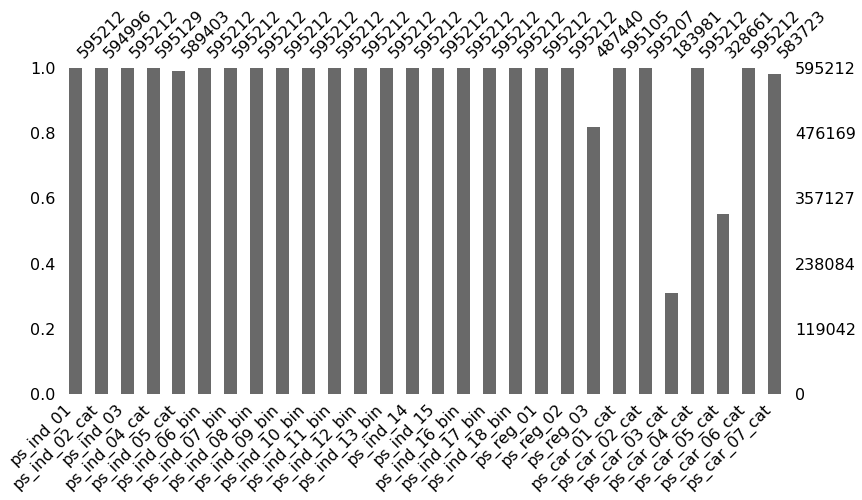

In [9]:
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN)

msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,6))

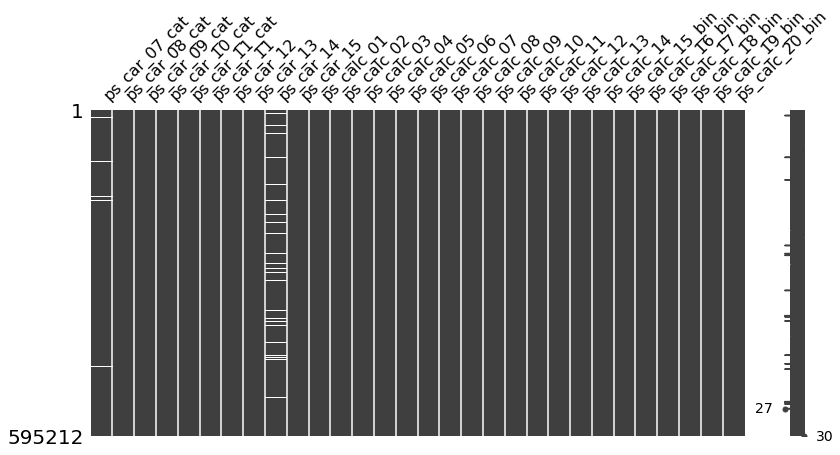

In [9]:
msno.matrix(df=train_copy.iloc[:, 29:], figsize=(13,6))

##시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')


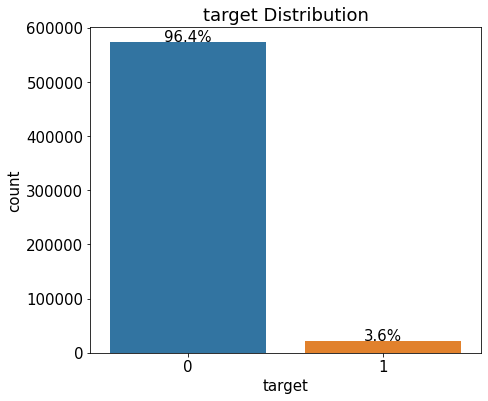

In [9]:
mpl.rc('font', size = 15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('target Distribution')
plt.show()

타겟값이 불균형하다 때문에 비율이 작은 타깃값 1을 잘 예측하는 게 중요하다. 따라서 고윳값별 타겟값 1 비율을 알아보자

In [11]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

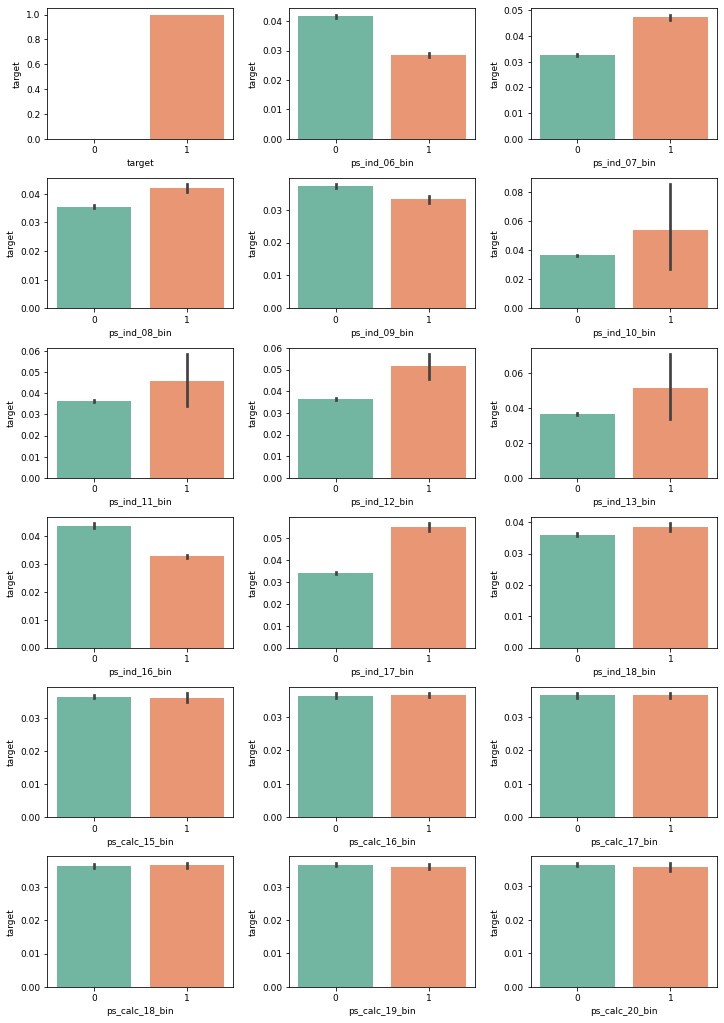

In [12]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

고윳값별로 타겟값 비율차이가 있고 신뢰구간이 좁아야 통계적으로 유효한 피처!

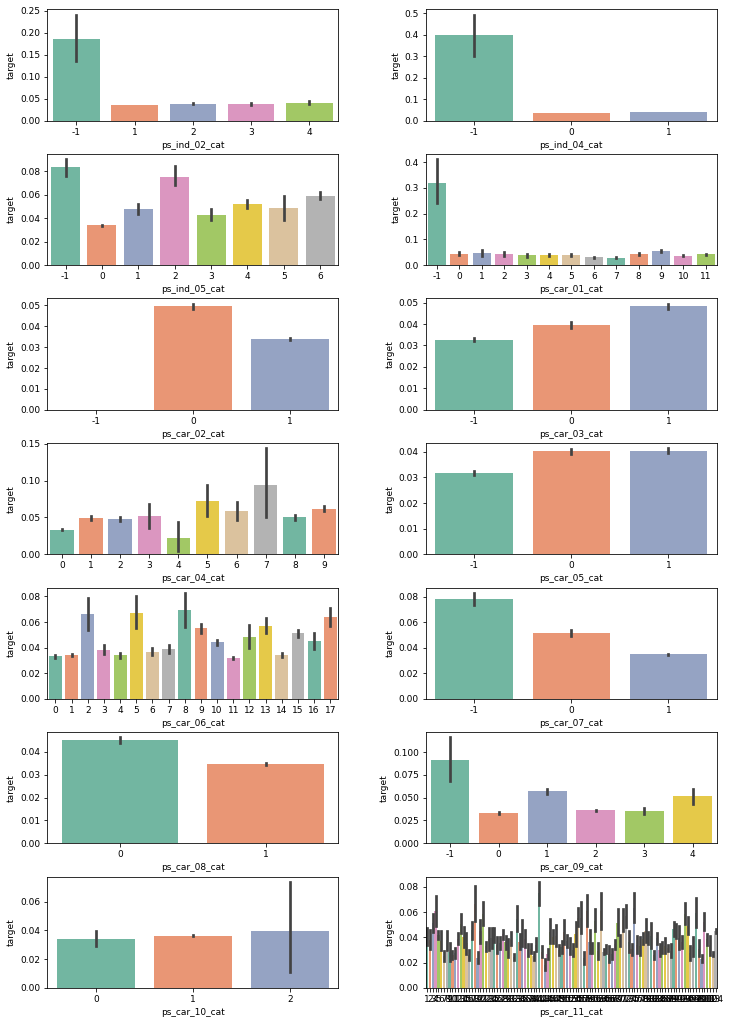

In [13]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7, 2) # 7행 2열


결측값은 -1이다. 하지만 결측값 자체가 타겟값에 예측력이 있다면 고유값으로 간주(결측값 처리 필요 없음)

ps-ind-02-cat을 보면 -1컬럼의 신뢰하한과 다른 컬럼의 신뢰상한 간 차이가 크기때문에 -1의 신뢰구간이 넓더라도 필요한 피처가 된다.

문제가 될 수 있는 피처는 ps_car_10_cat인데 애매하다. 모델링할 때 제거한 경우와 제거하지 않은 경우에 성능비교를 통해 정해보자

In [12]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 순서형 피처
#plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20)) # 8행 2열 #코랩 램 부족

In [13]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처


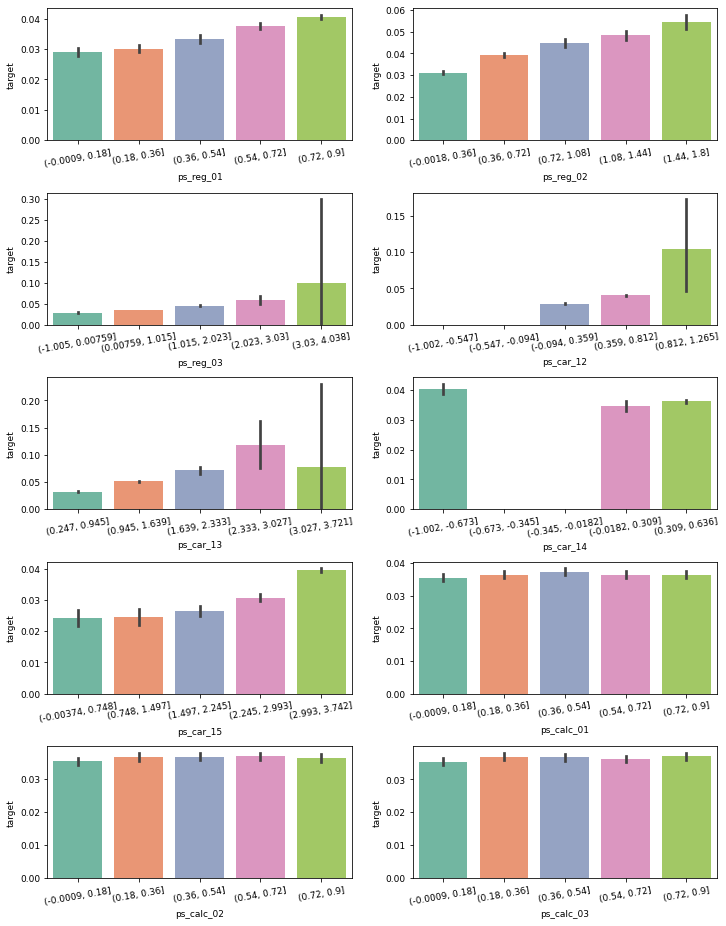

In [23]:
plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

In [14]:
train_copy = train_copy.dropna()

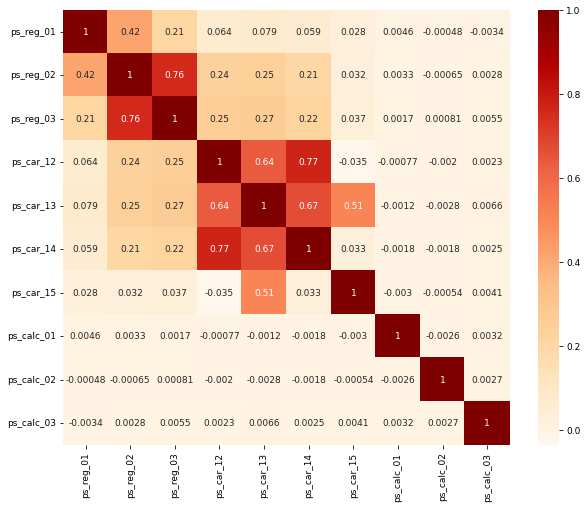

In [28]:
plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr,annot=True, cmap='OrRd')

너무 강한 상관관계를 보이는 피처는 학습에 악영향을 줄 수 있다.
둘 중 하나를 drop시키고 학습하면서 성능향상에 도움되는 방법을 찾자!

#베이스라인 모델 LightBGM

In [15]:
all_data = pd.concat([train,test],ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [22]:
all_features = summary.drop('target',axis=0).index

In [17]:
cat_features = summary[summary['데이터 종류'] == '명목형'].index

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_cat_matrix = encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [23]:
# 추가로 제거할 피처
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# '1) 명목형 피처, 2) calc 분류의 피처, 3) 추가 제거할 피처'를 제외한 피처
remaining_features = [feature for feature in all_features 
                      if ('cat' not in feature and 
                          'calc' not in feature and 
                          feature not in drop_features)]

In [26]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                               encoded_cat_matrix],
                              format='csr')

In [28]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target'].values

In [29]:
def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [39]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

In [58]:
import lightgbm as lgb

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):

    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    lgb_model = lgb.train(params=params,
                          train_set=dtrain,
                          num_boost_round=1000,        # 부스팅 횟수
                          valid_sets=dvalid,
                          feval=gini,                  # 검증용 평가지표
                          early_stopping_rounds=100,   # 조기종료 조건
                          verbose_eval=100)            # 100번째마다 점수 출력

    # kfold로 5개로 쪼개서 predict한 값을 각각 5로 나눠서 총합하면 평균 예측값이 나온다.
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측    #검증값은 지니계수(얼마나 흩어져있나)이기때문에 나누지않아도됨
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.15336	valid_0's gini: 0.261801
[200]	valid_0's binary_logloss: 0.152428	valid_0's gini: 0.275964
[300]	valid_0's binary_logloss: 0.152018	valid_0's gini: 0.282624
[400]	valid_0's binary_logloss: 0.151798	valid_0's gini: 0.286985
[500]	valid_0's binary_logloss: 0.151716	valid_0's gini: 0.288374
[600]	valid_0's binary_logloss: 0.151677	valid_0's gini: 0.288793
[700]	valid_0's binary_logloss: 0.151671	valid_0's gini: 0.288778
Early stopping, best iteration is:
[646]	valid_0's binary_logloss: 0.151673	valid_0's gini: 0.288887
폴드 1 지니계수 : 0.2888871820172969

######################################## 폴드 2 / 폴드 5 ########################################
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.153506	valid_0's gini: 0.249477
[200]	valid_0's binary_log

In [61]:
oof_val_preds

array([0.04009884, 0.03117701, 0.01862548, ..., 0.02152761, 0.02541293,
       0.01977447])

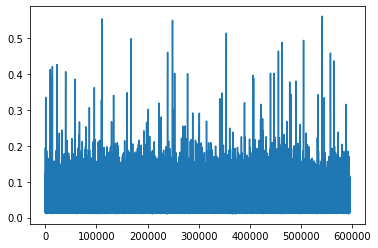

In [64]:
plt.plot(oof_val_preds)

In [69]:
sub['target'] = oof_test_preds
sub.to_csv('submission.csv')

#성능개선

In [71]:
all_data = pd.concat([train,test],ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

In [72]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature] 

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

In [78]:
all_data['num_missing'] = (all_data==-1).sum(axis=1)
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)] 
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

##피처엔지니어링

In [79]:
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [90]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [93]:
all_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_03_cat_count,ps_car_04_cat_count,ps_car_05_cat_count,ps_car_06_cat_count,ps_car_07_cat_count,ps_car_08_cat_count,ps_car_09_cat_count,ps_car_10_cat_count,ps_car_11_cat_count,mix_ind_count
0,2,2,5,1,0,0,1,0,0,0,...,1028142,1241334,431560,77845,1383070,249663,486510,1475460,18326,6
1,1,1,7,0,0,0,0,1,0,0,...,1028142,1241334,666910,329890,1383070,1238365,883326,1475460,12535,36
2,5,4,9,1,0,0,0,1,0,0,...,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,19943,24
3,0,1,2,0,0,1,0,0,0,0,...,183044,1241334,431560,329890,1383070,1238365,36798,1475460,212989,2784
4,0,2,0,1,0,1,0,0,0,0,...,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,26161,258


In [94]:
from scipy import sparse
# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [97]:
all_data_remaining.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15', 'num_missing',
       'ps_ind_02_cat_count', 'ps_ind_04_cat_count', 'ps_ind_05_cat_count',
       'ps_car_01_cat_count', 'ps_car_02_cat_count', 'ps_car_03_cat_count',
       'ps_car_04_cat_count', 'ps_car_05_cat_count', 'ps_car_06_cat_count',
       'ps_car_07_cat_count', 'ps_car_08_cat_count', 'ps_car_09_cat_count',
       'ps_car_10_cat_count', 'ps_car_11_cat_count', 'mix_ind_count'],
      dtype='object')

In [103]:
summary

,데이터타입,결측치 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [104]:
all_data[['mix_ind_count']]

,mix_ind_count
0,6
1,36
2,24
3,2784
4,258
...,...
1488023,107
1488024,26
1488025,258
1488026,37


##하이퍼파라미터 튜닝

In [105]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [106]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [107]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

In [108]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    
    # 베이지안 최적화를 수행할 하이퍼파라미터 
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터:', params)    
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                           early_stopping_rounds=300,
                           verbose_eval=False)
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

In [110]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=03d58cb84ff0c23710d1e7d8031a8b2bfcaf1e1ef2086ecc2f68b2b8899e7279
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [112]:
from bayes_opt import BayesianOptimization
# colab gpu 51minute
# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
지니계수 : 0.2846778857441302

|  1        |  0.2847   |  0.7646   |  0.6715   |  0.8206   |  0.9545   |  7.695    |  29.38    |  34.38    |
하이퍼파라미터: {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False,

In [114]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']

# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

max_params

{'bagging_fraction': 0.6213108174593661,
 'bagging_freq': 1,
 'feature_fraction': 0.608712929970154,
 'force_row_wise': True,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'learning_rate': 0.005,
 'min_child_samples': 9,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 40,
 'objective': 'binary',
 'random_state': 1991}

#모델 훈련 및 성능 검증

In [115]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋
                          
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=max_params,    # 최적 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          early_stopping_rounds=300, # 조기종료 조건
                          verbose_eval=100)     # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
Training until validation scores don't improve for 300 rounds.
[100]	valid_0's binary_logloss: 0.154241	valid_0's gini: 0.271666
[200]	valid_0's binary_logloss: 0.153174	valid_0's gini: 0.275957
[300]	valid_0's binary_logloss: 0.15257	valid_0's gini: 0.279949
[400]	valid_0's binary_logloss: 0.152211	valid_0's gini: 0.283467
[500]	valid_0's binary_logloss: 0.151976	valid_0's gini: 0.286585
[600]	valid_0's binary_logloss: 0.151808	valid_0's gini: 0.289307
[700]	valid_0's binary_logloss: 0.151695	valid_0's gini: 0.291359
[800]	valid_0's binary_logloss: 0.15161	valid_0's gini: 0.292997
[900]	valid_0's binary_logloss: 0.151539	valid_0's gini: 0.294563
[1000]	valid_0's binary_logloss: 0.151491	valid_0's gini: 0.295693
[1100]	valid_0's binary_logloss: 0.151448	valid_0's gini: 0.296762
[1200]	valid_0's binary_logloss: 0.151417	valid_0's gini: 0.297467
[1300]	valid_0's binary_logloss: 0.151395	valid_0'

#모델저장

In [122]:
import joblib

joblib.dump(lgb_model, 'lgb.pkl')

['lgb.pkl']

In [123]:
lgb_model

#제출

In [125]:
sub['target'] = oof_test_preds
sub.to_csv('lgb.csv')